In [201]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

In [202]:
df = pd.read_csv('incidents.csv', sep=',') #alternative in case of json source df.to_json('filename.json')
df
df.columns
df.info()


/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_8554/2244244154.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('incidents.csv', sep=',') #alternative in case of json source df.to_json('filename.json')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [203]:
df["date"] = df["date"].astype("datetime64[ns]")
df["state"] = df["state"].astype("string")
df["city_or_county"] = df["city_or_county"].astype("string")
df["address"] = df["address"].astype("string")
df["congressional_district"] = df["congressional_district"].astype("Int64")
df["state_house_district"] = df["state_house_district"].astype("Int64")
df["state_senate_district"] = df["state_senate_district"].astype("Int64")
df["participant_age1"] = df["participant_age1"].astype("Int64")
df["min_age_participants"] = pd.to_numeric(df["min_age_participants"], errors="coerce").astype("Int64")
df["max_age_participants"] = pd.to_numeric(df["max_age_participants"], errors="coerce").astype("Int64")
df["avg_age_participants"] = pd.to_numeric(df["avg_age_participants"], errors="coerce").astype("float64")
df[df['participant_gender1'] == 'Male, female'] = np.nan
df["participant_gender1"] = df["participant_gender1"].astype("string")
df["participant_age_group1"] = df["participant_age_group1"].astype("string")
df["n_participants_teen"] = pd.to_numeric(df["n_participants_teen"], errors="coerce").astype("Int64")
df["n_participants_child"] = pd.to_numeric(df["n_participants_child"], errors="coerce").astype("Int64")
df["n_participants_adult"] = pd.to_numeric(df["n_participants_adult"], errors="coerce").astype("Int64")
df["n_males"] = pd.to_numeric(df["n_males"], errors="coerce").astype("Int64")
df["n_females"] = pd.to_numeric(df["n_females"], errors="coerce").astype("Int64")
df["n_killed"] = pd.to_numeric(df["n_killed"], errors="coerce").astype("Int64")
df["n_injured"] = pd.to_numeric(df["n_injured"], errors="coerce").astype("Int64")
df["n_arrested"] = pd.to_numeric(df["n_arrested"], errors="coerce").astype("Int64")
df["n_unharmed"] = pd.to_numeric(df["n_unharmed"], errors="coerce").astype("Int64")
df["n_participants"] = pd.to_numeric(df["n_participants"], errors="coerce").astype("Int64")
df["notes"] = df["notes"].astype("string")
df["incident_characteristics1"] = df["incident_characteristics1"].astype("string")
df["incident_characteristics2"] = df["incident_characteristics2"].astype("string")           
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       239676 non-null  datetime64[ns]
 1   state                      239676 non-null  string        
 2   city_or_county             239676 non-null  string        
 3   address                    223179 non-null  string        
 4   latitude                   231753 non-null  float64       
 5   longitude                  231753 non-null  float64       
 6   congressional_district     227732 non-null  Int64         
 7   state_house_district       200904 non-null  Int64         
 8   state_senate_district      207341 non-null  Int64         
 9   participant_age1           147378 non-null  Int64         
 10  participant_age_group1     197557 non-null  string        
 11  participant_gender1        203314 non-null  string  

In [204]:
poverty_df = pd.read_csv('povertyByStateYear.csv', sep=',')
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [205]:
poverty_df["state"] = poverty_df["state"].astype("string")
poverty_df["year"] = poverty_df["year"].astype("Int64")

In [206]:
district_in_state_df = pd.read_csv('year_state_district_house.csv', sep=',')
district_in_state_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


In [207]:
district_in_state_df["state"] = district_in_state_df["state"].astype("string")
district_in_state_df["year"] = district_in_state_df["year"].astype("Int64")
district_in_state_df["congressional_district"] = district_in_state_df["congressional_district"].astype("Int64")
district_in_state_df["party"] = district_in_state_df["party"].astype("string")
district_in_state_df["candidatevotes"] = district_in_state_df["candidatevotes"].astype("Int64")
district_in_state_df["totalvotes"] = district_in_state_df["totalvotes"].astype("Int64")

In [208]:
#count number of rows where address has value
#df[df['n_participants_teen'] == -854]
#df[(df['participant_age1']).notna() == False]
df.loc[(df["avg_age_participants"] > 120) | (df["avg_age_participants"] < 0), "avg_age_participants"] = np.nan
df.loc[(df["min_age_participants"] > 120) | (df["min_age_participants"] < 0), "min_age_participants"] = np.nan
df.loc[(df["max_age_participants"] > 120) | (df["max_age_participants"] < 0), "max_age_participants"] = np.nan
df.loc[(df["participant_age1"] > 120) | (df["participant_age1"] < 0), "participant_age1"] = np.nan



#df[(df['participant_age1']).notna() == False & ((df['avg_age_participants'] < 0) | (df['avg_age_participants'] > 120)) ][["avg_age_participants","max_age_participants","participant_age1","min_age_participants","notes"]]

In [209]:
df

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7,94,33,19,...,1,0,0,1,0,0,1,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,<NA>
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5,<NA>,<NA>,62,...,1,0,1,0,0,0,1,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14,4,2,<NA>,...,<NA>,<NA>,0,1,0,1,2,1 inj.,Shot - Wounded/Injured,<NA>
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1,<NA>,<NA>,<NA>,...,1,0,0,1,0,0,2,<NA>,Shot - Wounded/Injured,<NA>
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14,<NA>,<NA>,<NA>,...,1,0,0,1,0,1,2,<NA>,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,2016-01-11,Tennessee,Murfreesboro,Hazelwood Street,35.8624,-86.3695,4,37,14,<NA>,...,1,0,0,1,0,0,1,"Tried to grab gun as it fell, shot self in foot.",Shot - Wounded/Injured,Non-Aggression Incident
239673,2029-01-01,New York,Troy,Pawling and Plum Avenues,42.7043,-73.6590,20,108,44,<NA>,...,2,0,0,0,0,3,3,<NA>,Armed robbery with injury/death and/or evidenc...,<NA>
239674,2017-08-17,Tennessee,Memphis,Barron Ave and Pendleton St,35.1007,-89.9700,9,93,33,58,...,1,0,0,1,0,0,1,"Orange Mound, man shot",Shot - Wounded/Injured,<NA>
239675,2016-06-07,Colorado,Colorado Springs,601 Prospect Lake Drive,38.8251,-104.8020,5,18,11,68,...,2,0,0,0,1,1,2,Record ID 22972 on Colorado Springs Police Dep...,Non-Shooting Incident,Possession of gun by felon or prohibited person


In [210]:
#setting nan the dates that are after 2023-10-01
df.loc[(df["date"] > "2023-10-01"), "date"] = np.nan

#setting nan the lonitudes and latitudes that are not in the US
df.loc[(df["latitude"] > 64.85694) |
        (df["latitude"] < 19.50139), "latitude"] = np.nan
df.loc[(df["longitude"] < -161.75583) |
        (df["longitude"] > -68.01197), "longitude"] = np.nan


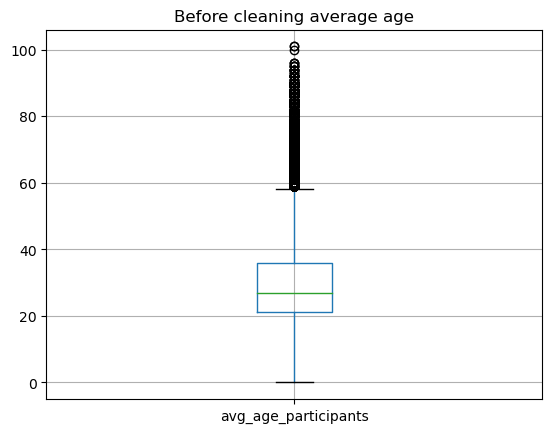

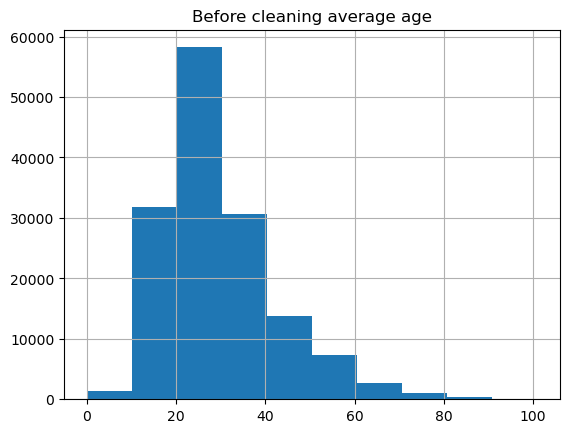

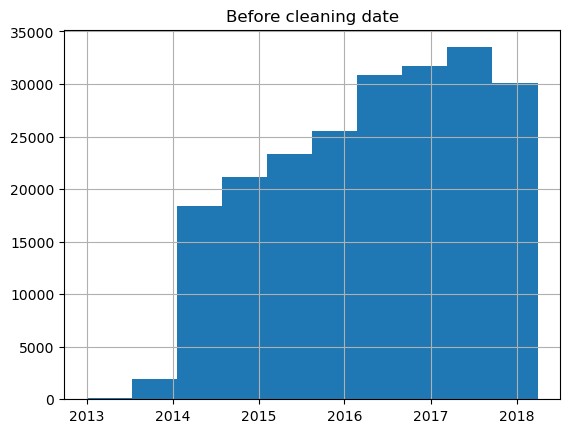

In [211]:
# Show plot before cleaning
#df[(df["avg_age_participants"] < 120) & (df["avg_age_participants"] >= 0) ].boxplot(column="avg_age_participants")
df.boxplot(column="avg_age_participants")
#count number of people with age > 60
#df[(df["avg_age_participants"] > 100)].count()
#plt.yscale('')
plt.title('Before cleaning average age')
plt.show()

#plotting an instogram of the average age
df[(df["avg_age_participants"] < 120) & (df["avg_age_participants"] >= 0) ].hist(column="avg_age_participants")
plt.title('Before cleaning average age')
plt.show()

#setting ages to 10 if they are below 10
df.loc[(df["avg_age_participants"] < 10), "avg_age_participants"] = 10
#setting ages to 60 if they are above 60
df.loc[(df["avg_age_participants"] > 60), "avg_age_participants"] = 60

# Plotting dates before cleaning
df.hist(column="date")
plt.title('Before cleaning date')
plt.show()


In [214]:
#print duplicates columns if they are not NaN   
df.drop_duplicates(inplace=True)
#print only the duplicated rows and sort them by the latitude
#df[df.duplicated()].sort_values(by=['latitude'])
#df[(df["date"] == "2016-03-13") & (df["latitude"] == 25.7944)]
#df[df.duplicated()]

#print the 4 row
#find the row with the same date and latitude and longitude, then print the row
#df_duplicated contains the rows where date and latitude and longitude are not NaN
df_duplicated = df[pd.notnull(df['date']) & pd.notnull(df['latitude']) & pd.notnull(df['longitude'])]

df_duplicated = df_duplicated[df_duplicated.duplicated(subset=["date","latitude","longitude"], keep=False)]


df_duplicated.sort_values(by=['date','latitude','longitude'])
#keep only one occurence from df_duplicated
#drop the duplicates from df, only if date, latitude and longitude are not NaN

# Check for NaN values in 'date', 'latitude', and 'longitude' columns
mask = df['date'].notna() & df['latitude'].notna() & df['longitude'].notna()
# Apply the mask to drop duplicates only where the condition is satisfied
df = df[mask].drop_duplicates(subset=["date", "latitude", "longitude"])





         date                 state             city_or_county  \
0  2015-05-02               Indiana               Indianapolis   
1  2017-04-03          Pennsylvania                       Kane   
2  2016-11-05              Michigan                    Detroit   
3  2016-10-15  District of Columbia                 Washington   
5  2014-01-18        North Carolina               Wayne County   
6  2018-01-25             Louisiana                    Zachary   
7  2016-03-16           Connecticut                  New Haven   
8  2016-08-01              Virginia                   Stafford   
9  2015-03-22              Oklahoma                      Tulsa   
10 2014-06-19              New York                      Bronx   
11 2016-12-21              Missouri      Kansas City (Raytown)   
12 2018-01-06            California                   Hesperia   
13 2017-02-17                 Texas                   Longview   
14 2016-08-26        North Carolina                  Asheville   
17 2016-02

In [121]:
#dp_df = df[df.duplicated(keep=False)]
#dp_df = df.groupby(['date','latitude','longitude']).any()
#dp_df = df.drop_duplicates()
#dp_df

columns_to_check = ["n_arrested", "n_females", "n_injured", "n_males", "n_participants",
                    "n_killed", "n_participants_adult", "n_participants_child",
                    "n_participants_teen", "n_unharmed"]
# Set values less than 0 to NaN for the specified columns
for i in columns_to_check:
    df[df[i] < 0] = np.nan



 


,n_arrested,n_females,n_injured,n_males,n_participants,n_killed,n_participants_adult,n_participants_child,n_participants_teen,n_unharmed


In [ ]:
for cl in dp_df.columns:
    x = dp_df[cl].unique()



In [ ]:
dp_df.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,228075.000000,228075.000000,224066.000000,197591.000000,203984.000000,147354.000000,203250.000000,203250.000000,235994.000000,235994.000000,211909.000000,211909.000000,235994.000000
mean,37.575602,-89.260542,7.957182,55.350213,20.444554,30.295811,1.520399,0.212408,0.256214,0.501610,0.468234,0.494396,1.661737
std,5.112009,14.332477,8.437548,42.084656,14.237334,13.363503,0.996883,0.490952,0.524869,0.732993,0.851154,0.925731,1.245858
min,19.111400,-171.429000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.940850,-93.786600,2.000000,21.000000,8.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.600200,-86.211600,5.000000,47.000000,19.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.456100,-80.008150,10.000000,84.000000,30.000000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.000000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [ ]:
dp_df.corr()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
latitude,1.000000,-0.052104,-0.252812,-0.232655,0.028232,-0.027894,-0.038207,-0.037378,-0.083895,-0.015430,0.026106,-0.045775,-0.072107
longitude,-0.052104,1.000000,-0.217374,0.236935,0.113388,-0.051461,0.003720,-0.016630,-0.065472,0.033679,-0.021573,0.012972,-0.016431
congressional_district,-0.252812,-0.217374,1.000000,0.222568,0.315964,0.012944,0.008040,-0.003594,0.058902,-0.004141,-0.003699,-0.009116,0.021083
state_house_district,-0.232655,0.236935,0.222568,1.000000,0.435994,0.008237,0.021845,0.014176,-0.004936,-0.029114,0.022883,0.040340,0.021365
state_senate_district,0.028232,0.113388,0.315964,0.435994,1.000000,0.010081,-0.005391,-0.004804,-0.009605,-0.043268,0.042467,-0.008597,-0.015461
participant_age1,-0.027894,-0.051461,0.012944,0.008237,0.010081,1.000000,-0.059859,0.067438,0.140185,-0.119316,-0.026179,-0.008729,-0.033671
n_males,-0.038207,0.003720,0.008040,0.021845,-0.005391,-0.059859,1.000000,-0.061580,0.133366,0.245710,0.373400,0.423123,0.823174
n_females,-0.037378,-0.016630,-0.003594,0.014176,-0.004804,0.067438,-0.061580,1.000000,0.179271,0.153597,0.119367,0.128408,0.369797
n_killed,-0.083895,-0.065472,0.058902,-0.004936,-0.009605,0.140185,0.133366,0.179271,1.000000,-0.131155,-0.049885,-0.154230,0.232215
n_injured,-0.015430,0.033679,-0.004141,-0.029114,-0.043268,-0.119316,0.245710,0.153597,-0.131155,1.000000,-0.171229,-0.109985,0.376579


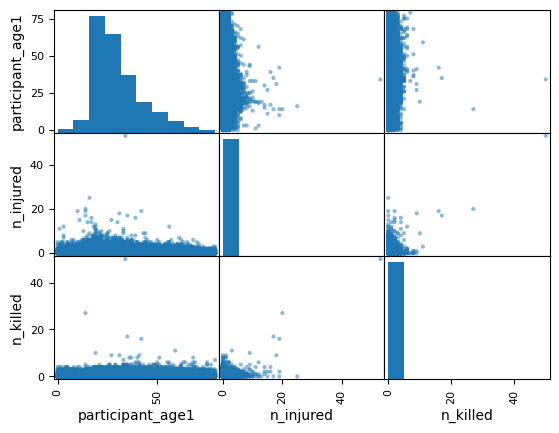

In [ ]:
#remove age greater than 80s
dp_df = dp_df[dp_df['participant_age1'] < 80]
pd.plotting.scatter_matrix(dp_df[['participant_age1', 'n_injured', 'n_killed']])
plt.show()

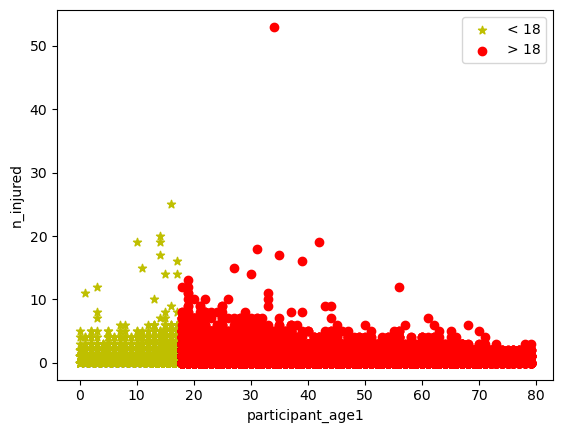

In [ ]:
plt.scatter(dp_df[dp_df['participant_age1'] < 18]['participant_age1'], 
            dp_df[dp_df['participant_age1'] < 18]['n_injured'], color='y', marker='*', label='< 18')

plt.scatter(dp_df[dp_df['participant_age1'] > 17]['participant_age1'], 
            dp_df[dp_df['participant_age1'] > 17]['n_injured'], color='r',label='> 18')
plt.xlabel('participant_age1')
plt.ylabel('n_injured')
plt.legend()
plt.show()

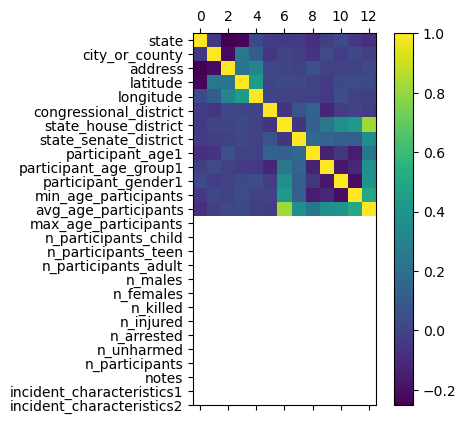

In [ ]:
#plot matrix with different colors for correlation
plt.matshow(dp_df.corr())
#legend for correlation
#add names of columns
plt.yticks(range(len(dp_df.columns)), dp_df.columns)
plt.colorbar()
plt.show()
